In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
os.getcwd()  # This will show your current working directory
#os.chdir('path_to_least_squares_folder')  # Change to the directory where helpers.py is located
os.chdir('/content/drive/My Drive/Colab Notebooks/Localization/Particle Filter 1D')

In [38]:
os.getcwd()
os.listdir()

['Particle Filter 1D.ipynb', '__init__.py', 'plot.py', 'a35.py', 'sim']

Starting Number of Particles: 40


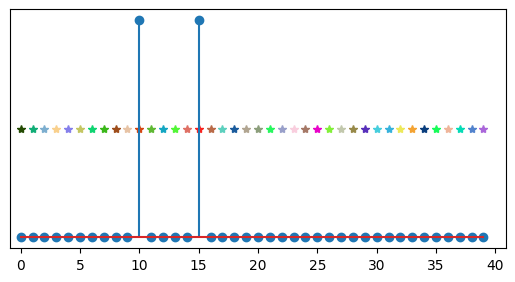

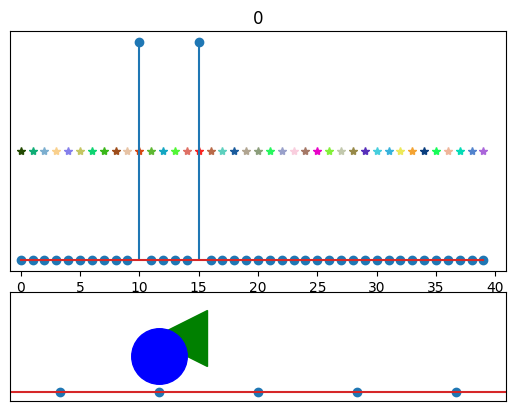

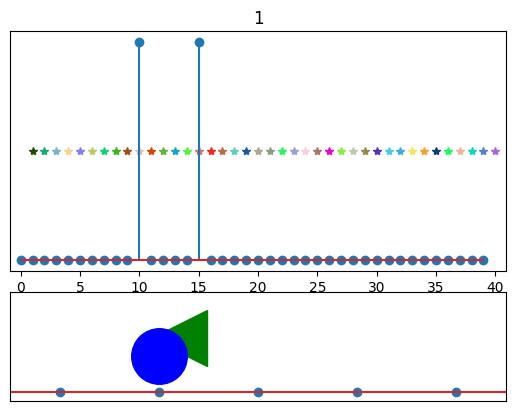

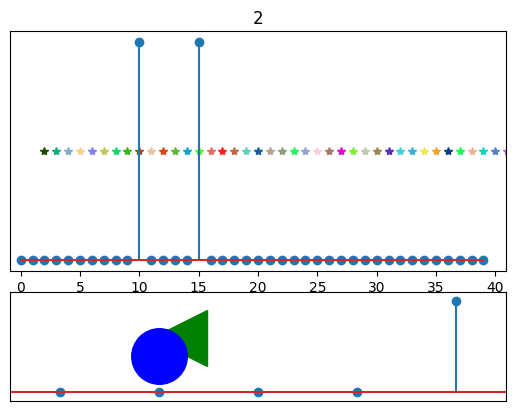

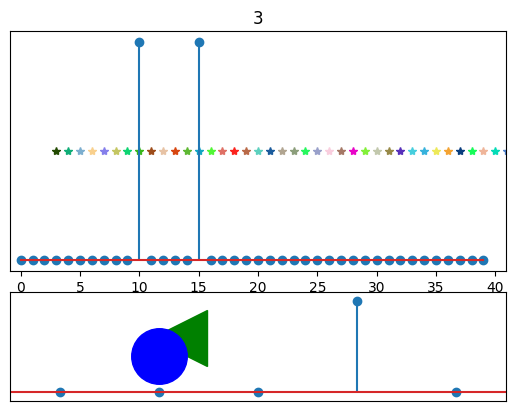

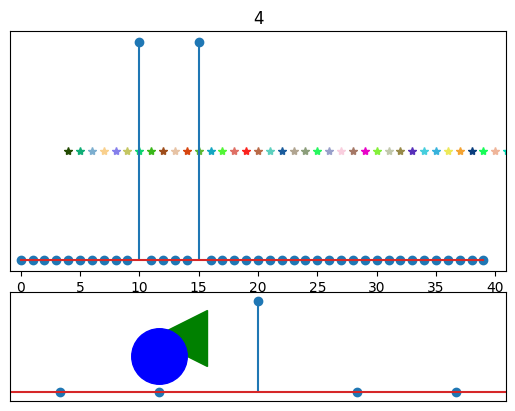

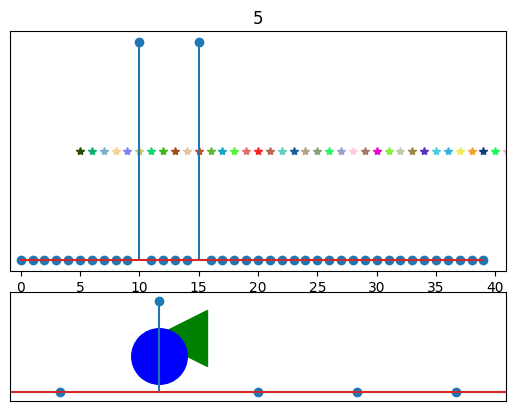

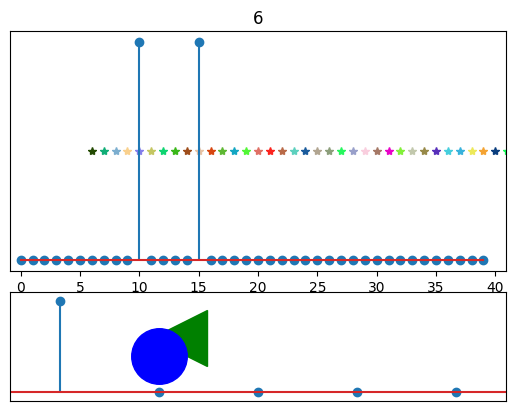

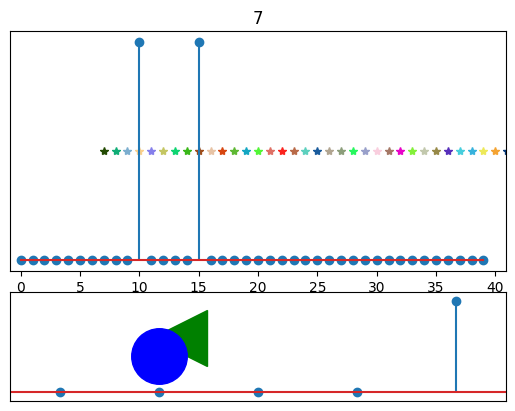

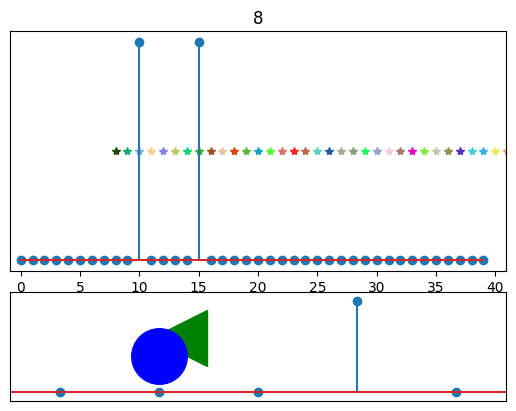

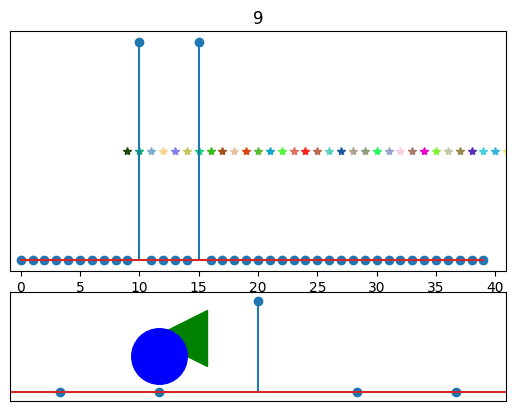

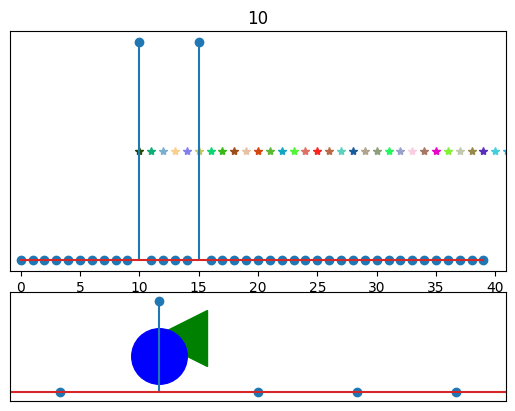

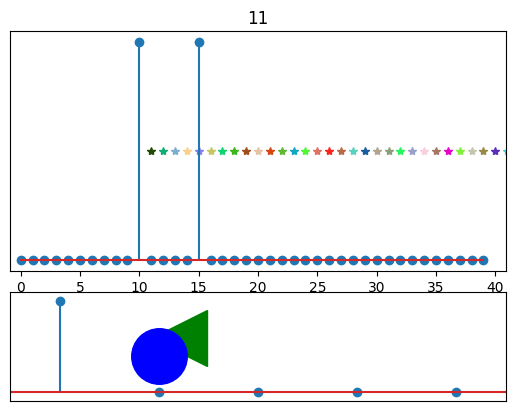

In [3]:
from plot import plot_simple
import random as r


class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.pole_detected = False
        self.move_dist = 1

    def move(self):
        self.pos += self.move_dist

    def detect_pole(self, poles):
        if self.pos + 1 in poles:
            self.pole_detected = True
        else:
            self.pole_detected = False


class Particle(Robot):
    def __init__(self, pos, color):
        # If you don't understand this, see derived_classes.py in my Python
        # Intro Course mentioned in the 2nd lecture.
        Robot.__init__(self, pos)
        self.belief = 1
        self.color = color

    def predict(self):
        # Move the particle the same distance as the robot moves.
        #Robot.move()
        self.pos += self.move_dist

    def update_belief(self, robot_pole_detected):
        # Set the belief to 0 if the robot detection and the particle detection
        # don't match.
        if self.pole_detected != robot_pole_detected:
          self.belif = 0

        # Setup Robot Location
robot = Robot(5)
poles = [10, 15]

# Setup particles.
num_of_locations = 40
particle_spacing = 1
print("Starting Number of Particles: " +
      str(int(num_of_locations / particle_spacing)))
particles = []
for i in range(0, num_of_locations, particle_spacing):
    color = (r.random(), r.random(), r.random(), 1)
    particles += [Particle(i, color)]

# Plot starting distribution, no beliefs
plot_simple(particles, poles)

# Begin Calculating
for j in range(12):
    # Move
    if j != 0:
        robot.move()
        for particle in particles:
            particle.predict()

    # Measure
    robot.detect_pole(poles)
    for particle in particles:
        particle.detect_pole(poles)

        # Update Beliefs
        particle.update_belief(robot.pole_detected)

    plot_simple(particles, poles, robot.pos, j)


Particle Pos: 0
Particle Pos: 1.1616824173818547
Particle Pos: 2.0084386951063418
Particle Pos: 3.062199331769995
Particle Pos: 4.235954493178968
Particle Pos: 5.631188151234561
Particle Pos: 6.384472723713077
Particle Pos: 7.389976540532833
Particle Pos: 8.631076854716184
Particle Pos: 9.76162476255261
Particle Pos: 10.712742211939945
1


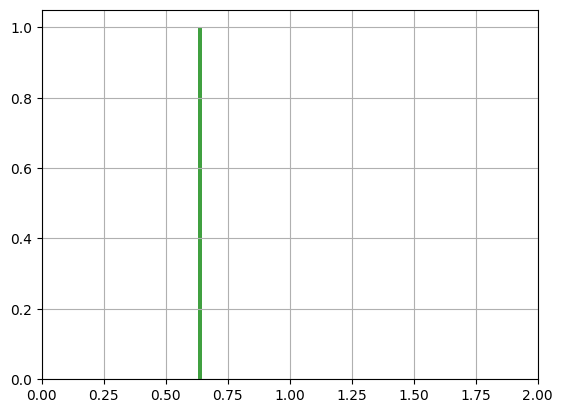

10


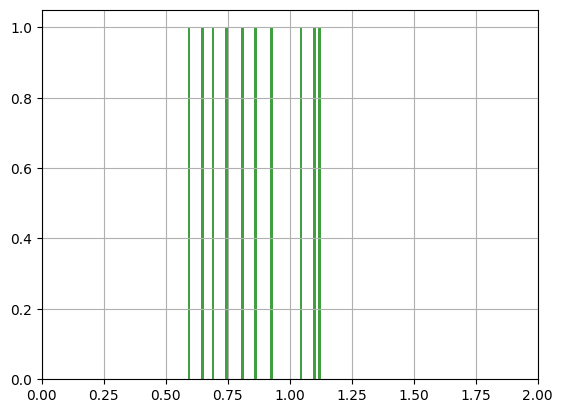

100


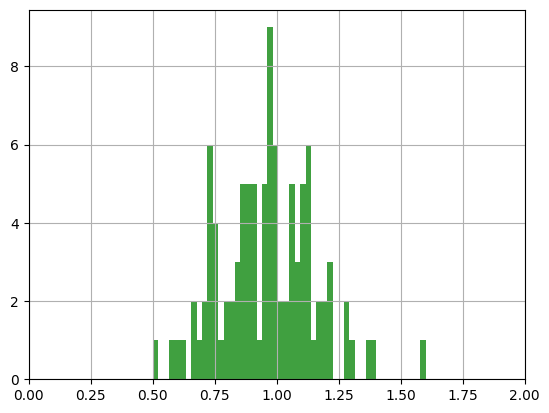

1000


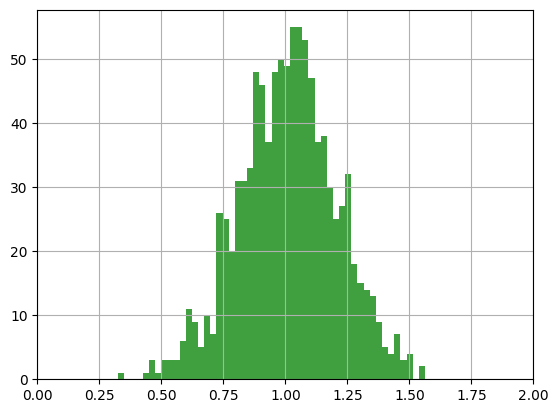

10000


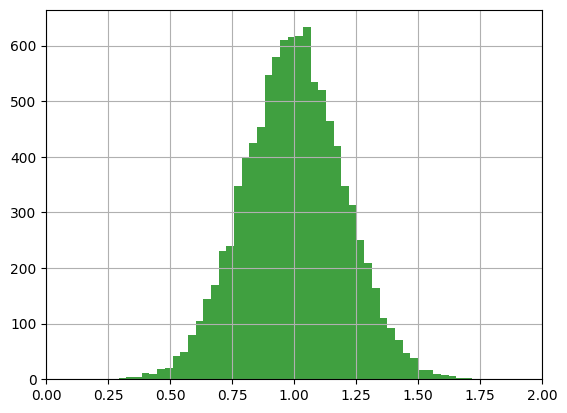

100000


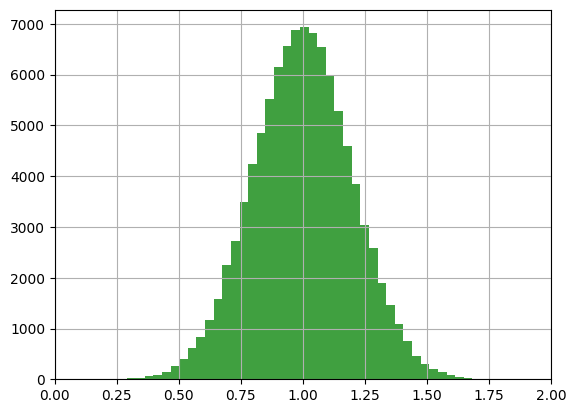

1000000


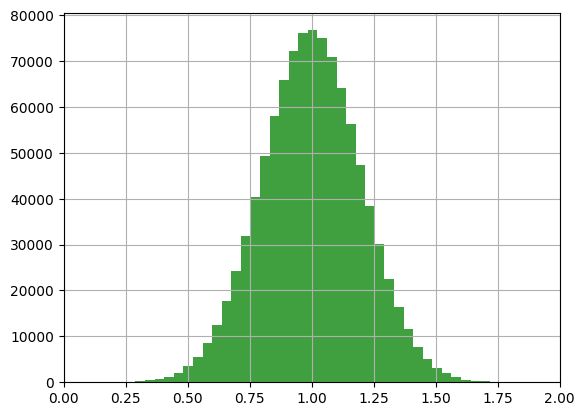

10000000


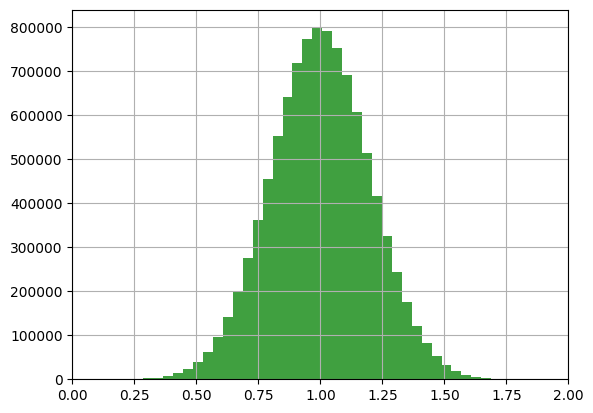

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np


class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.move_dist = 1

    # Movement is perfectly accurate, even though we are assuming it isn't.
    def move(self):
        self.pos += self.move_dist


class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)
        self.movement_sigma = 0.2

    def predict(self):
        # Predict the robots movement and account for movement uncertainty.
        self.pos = np.random.normal(self.pos + self.move_dist, self.movement_sigma)



particle = Particle(0)
# Move 10 times.
print("Particle Pos: " + str(particle.pos))
for i in range(10):
    particle.predict()
    print("Particle Pos: " + str(particle.pos))

# Remove quit() to see how distribution converges with more samples.
# quit()

sample_count = 1
for i in range(8):
    x = np.random.normal(
        particle.move_dist,
        particle.movement_sigma,
        sample_count)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.75)
    plt.grid(True)
    plt.xlim([0, 2])
    print(sample_count)
    plt.show(block=False)
    plt.pause(2)
    if i == 7:
        plt.pause(100)
    plt.close()

    sample_count *= 10


In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random as r


class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.pole_dist = -100
        self.max_measurement = 3

    # Measurement is perfectly accurate even though we are assuming it isn't.
    def measure(self, poles):
        # Set self.pole_dist to the distance to the closest pole.
        potential_detected_poles = []
        for pole in poles:
          diff = pole = self.pos
          if diff > 0 and diff <self.max_measurement:
            potential_detected_poles += [diff]
        if len(potential_detected_poles) == 0:
          self.pole_dist = -100
        else:
          self.pole_dist = min(potential_detected_poles)

class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)



poles = [1, 10]
particle = Particle(0.1)
particle.measure(poles)
print("Output Should Be 0.9")
print("You Calculated: " + str(round(particle.pole_dist, 1)))
print()

particle.pos = 11
particle.measure(poles)
print("Output Should Be -100")
print("You Calculated: " + str(round(particle.pole_dist, 1)))
print()

particle.pos = 6.9
particle.measure(poles)
print("Output Should Be -100")
print("You Calculated: " + str(round(particle.pole_dist, 1)))
print()

particle.pos = 7.1
particle.measure(poles)
print("Output Should Be 2.9")
print("You Calculated: " + str(round(particle.pole_dist, 1)))
print()

particle.pos = 9.5
particle.measure(poles)
print("Output Should Be 0.5")
print("You Calculated: " + str(round(particle.pole_dist, 1)))
print()


Output Should Be 0.9
You Calculated: 0.1

Output Should Be -100
You Calculated: -100

Output Should Be -100
You Calculated: -100

Output Should Be 2.9
You Calculated: -100

Output Should Be 0.5
You Calculated: -100



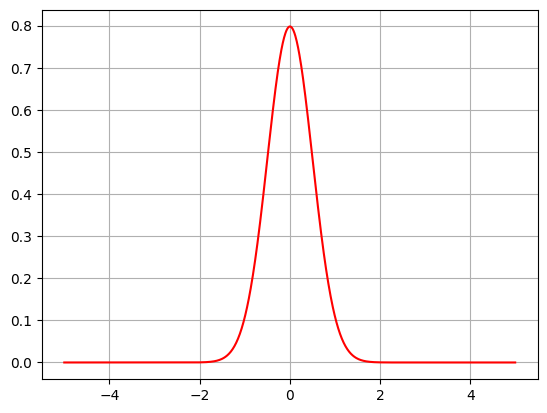

If Probability is close to 0.5, then PDF works.
0.5

Particle Weight: 0.8


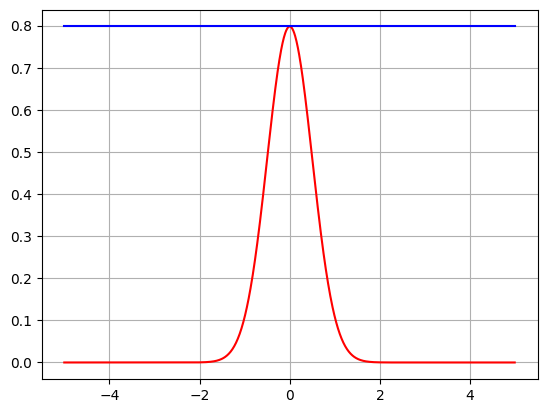

In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random as r


class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.pole_dist = 0


class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)
        self.weight = 0
        self.measurement_sigma = 0.5

    def probability_density_function(self, mu, x):
        sigma = self.measurement_sigma
        return 1 / (sigma * math.sqrt(2 * math.pi)) * \
                         math.e**(-0.5 * ((x - mu) / sigma)**2)

    def update_weight(self, robot_dist):
        self.weight = self.probability_density_function(robot_dist, self.pole_dist)


# Plot Weights for a range of robot measurements.
particle = Particle(0.0)
x = np.arange(-5, 5, 0.01)
y = np.zeros(len(x))
for i in range(len(x)):
    particle.update_weight(x[i])
    y[i] = particle.probability_density_function(0, x[i])

plt.plot(x, y, '-r')
plt.grid(True)
plt.show()

# Integrate left side to calculate probablity.
sum_probability = 0
for i in range(int(len(y) / 2)):
    sum_probability += y[i]

print("If Probability is close to 0.5, then PDF works.")
print(round(sum_probability * 0.01, 2))
print()

# Update Particle Weigth based on robot measurement.
robot_dist = 3.0
particle.pole_dist = 3.0
particle.update_weight(robot_dist)
print("Particle Weight: " + str(round(particle.weight, 2)))
plt.plot(x, y, '-r')
plt.plot([-5, 5], [particle.weight, particle.weight], '-b')
plt.grid(True)
plt.show()


Weights: [1, 1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[6, 6, 1, 2, 1, 7, 2, 2, 0, 1]


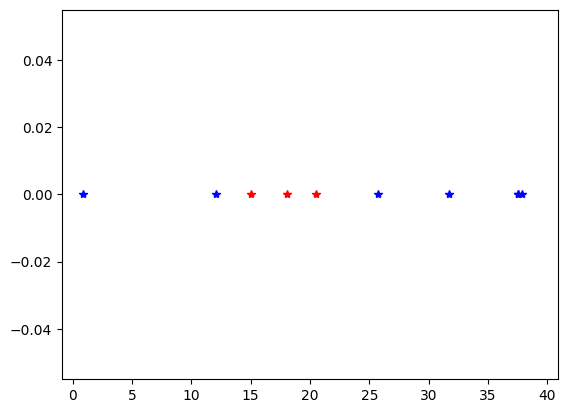

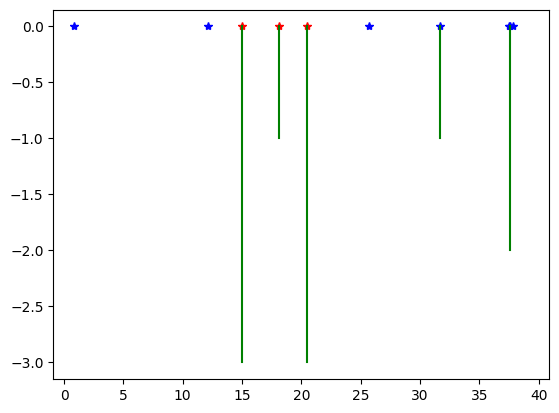

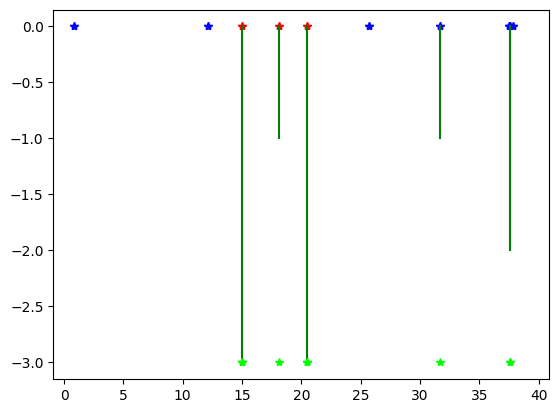

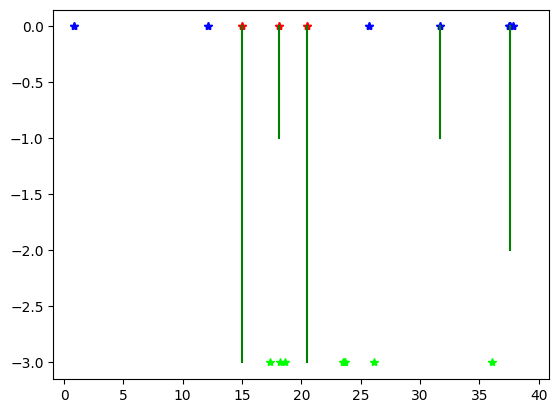

In [11]:
from a35 import plot

import random as r
import numpy as np


class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.move_dist = 1


class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)
        self.weight = 0
        self.movement_sigma = 1
        self.move_dist = 4  # Overwrite move distance for this example
        self.color = (0, 0, 1, 1)

    def predict(self):
        self.pos = np.random.normal(self.pos + self.move_dist, self.movement_sigma)

def resample_particles(particles):
    # Please fill this array with the output of the r.choices function.
    weights = []
    for particle in particles:
      weights += [particle.weight]

    print("Weights: " + str(weights))
    resample = r.choices(range(num_particles), weights, k=num_particles)
    print(resample)

    # Please fill this array with resampled partciles.
    resampled_particles = []
    for i in resample:
      resampled_particles += [Particle(particles[i].pos)]
      # Set all resampled particles to a different color.
      resampled_particles[-1].color = (0, 1, 0, 1)

    # Plot and return resampled particles.
    plot(particles, resampled_particles, resample, distance)
    return resampled_particles


num_particles = 10
distance = 40
particles = []

# Set first few particles to different weight and color.
for i in range(num_particles):
    particles += [Particle(r.uniform(0, distance))]
    if i < 3:
        particles[-1].weight = 1
        particles[-1].color = (1, 0, 0, 1)
    else:
        particles[-1].weight = 0.1

# Resample Particles
resampled_particles = resample_particles(particles)


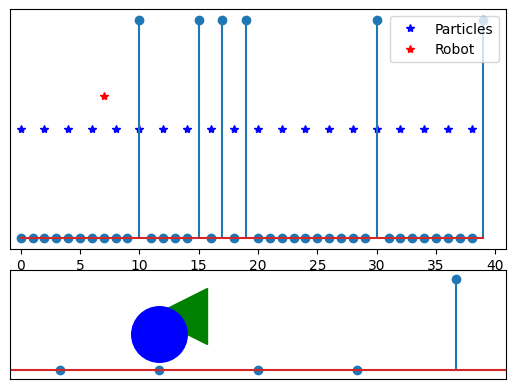

Error: 5.0
Weight Sum: 2.0987137645413902



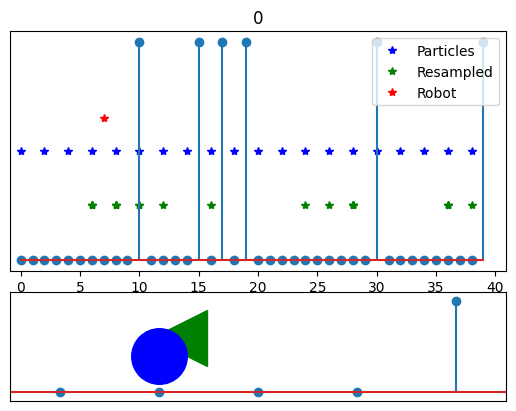

Error: 29.07
Weight Sum: 4.463549250790541



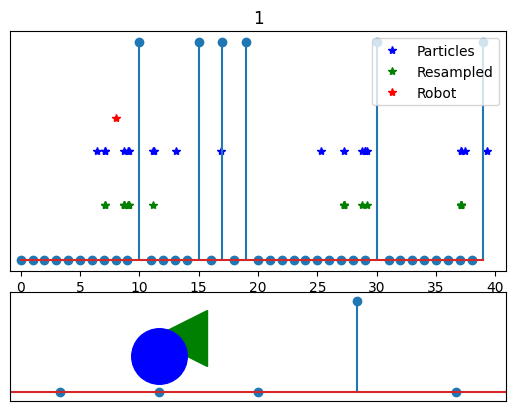

Error: 28.97
Weight Sum: 5.827797397175992



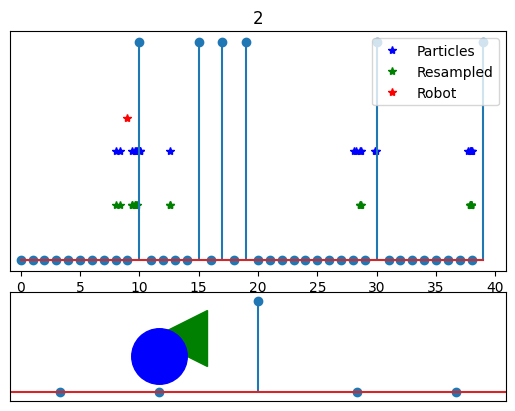

Error: 0.53
Weight Sum: 1.8981955142285665



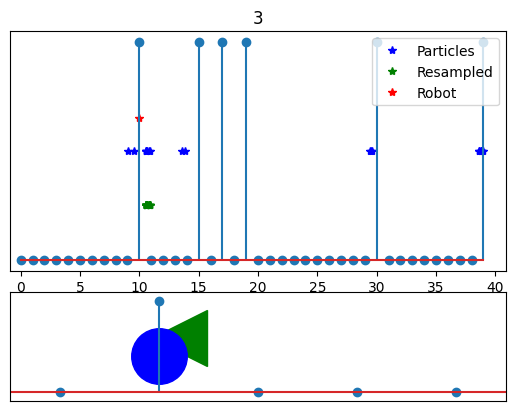

Error: 0.34
Weight Sum: 6.342880968324688



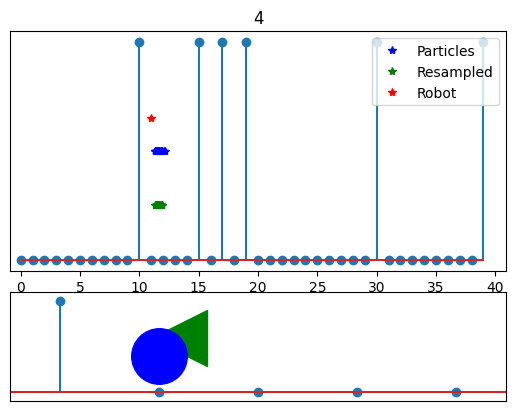

Error: 0.07
Weight Sum: 6.6413441464714635



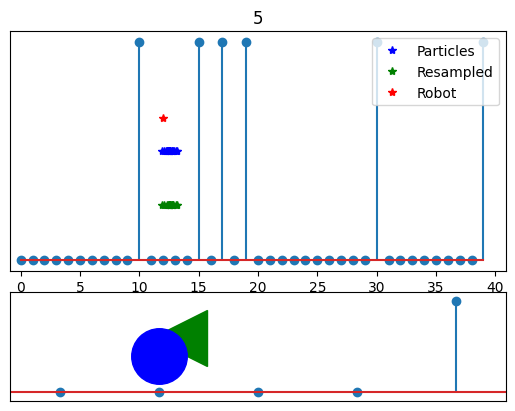

Error: 0.18
Weight Sum: 6.380439669479702



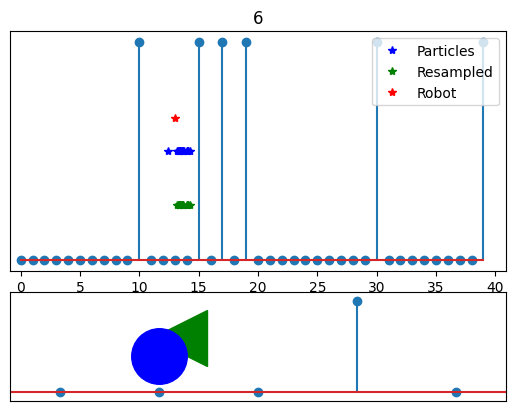

Error: 0.08
Weight Sum: 6.569852633445187



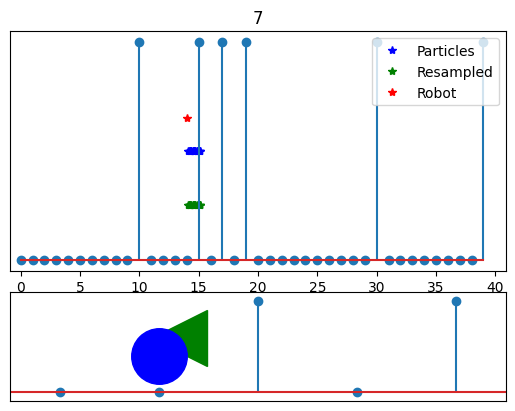

Error: 0.11
Weight Sum: 6.2892016024745745



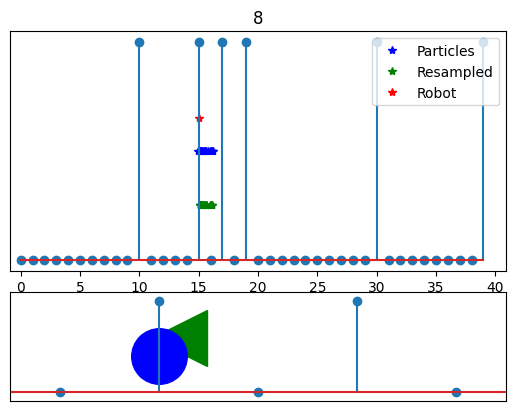

Error: 0.01
Weight Sum: 6.873991099592887



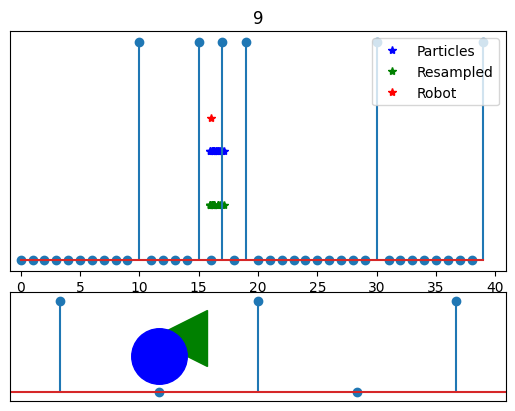

Error: 0.08
Weight Sum: 5.3415621045183395



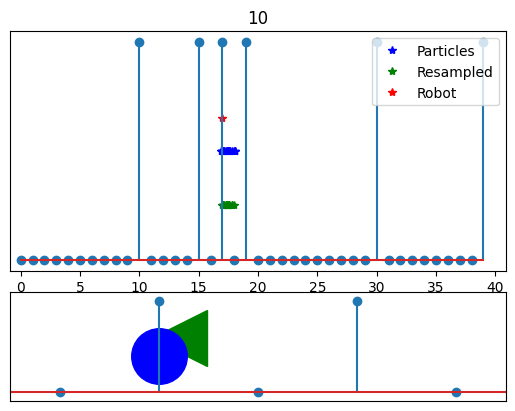

Error: 0.03
Weight Sum: 7.175541916273709



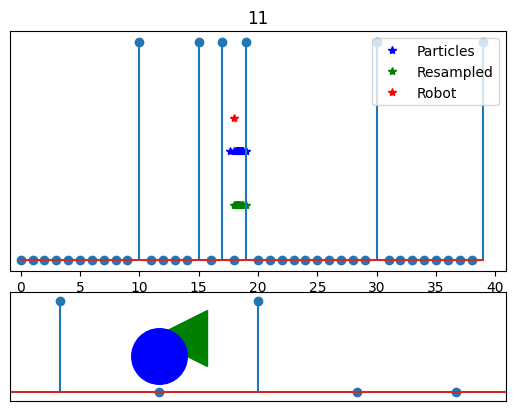

Error: 0.05
Weight Sum: 6.679933097497984



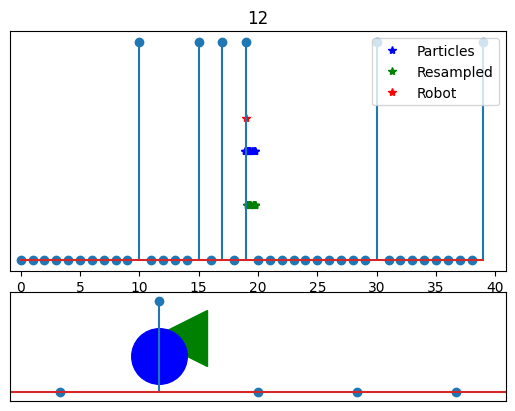

Error: 0.0
Weight Sum: 7.241298366365669



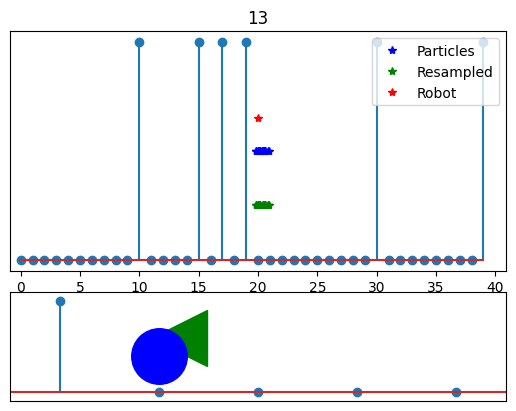

Error: 0.03
Weight Sum: 7.037973536841926



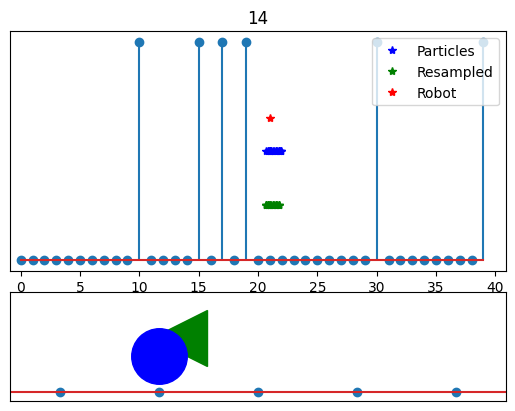

Error: 0.02
Weight Sum: 7.120585922274405



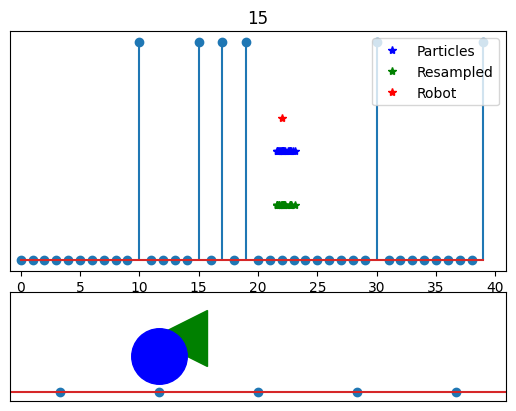

Error: 0.03
Weight Sum: 7.2874649810680445



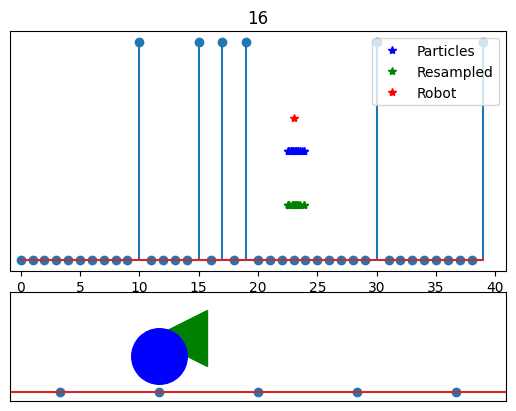

Error: 0.03
Weight Sum: 7.202819855671321



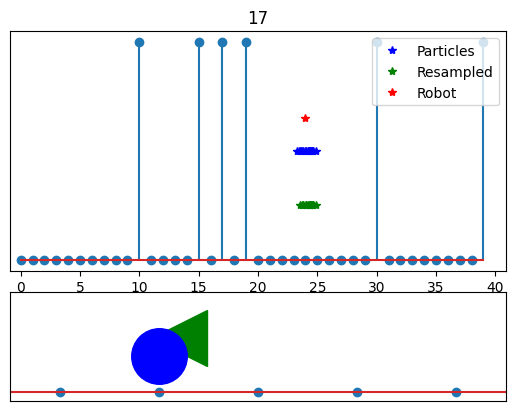

Error: 0.03
Weight Sum: 7.381364892229806



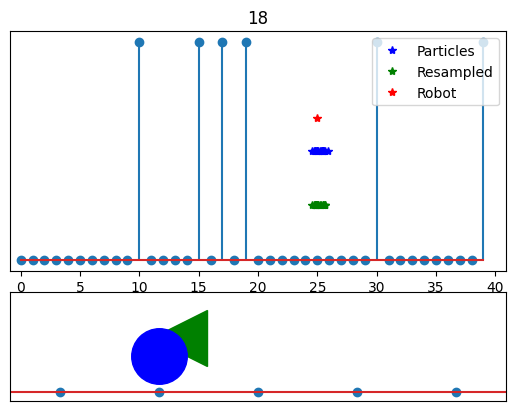

Error: 0.05
Weight Sum: 7.545244464549373



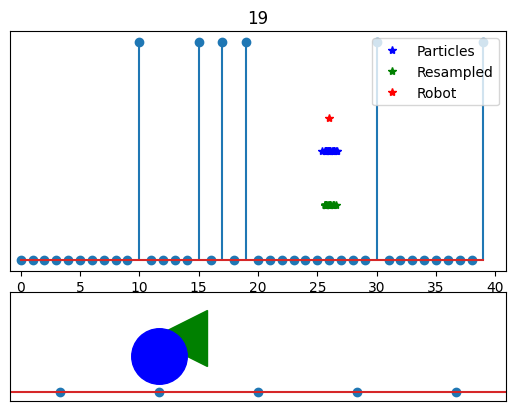

Error: 0.02
Weight Sum: 7.621445615081645



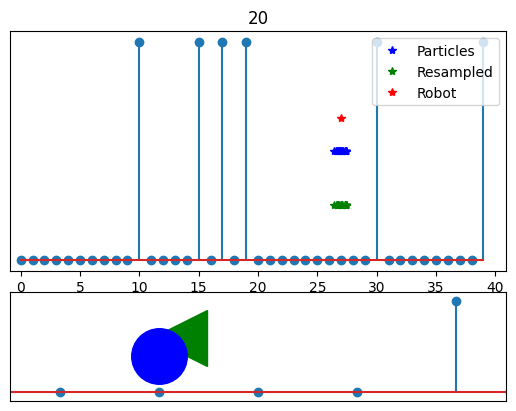

Error: 0.01
Weight Sum: 7.312796348922058



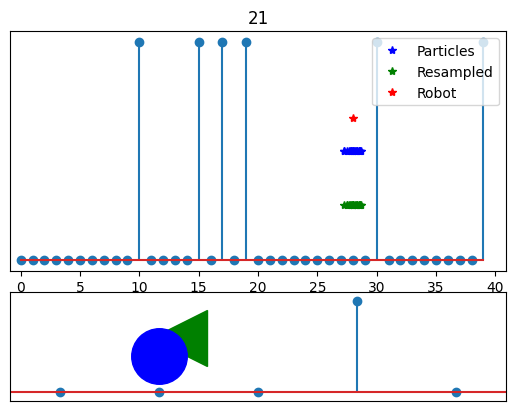

Error: 0.06
Weight Sum: 7.159487072604653



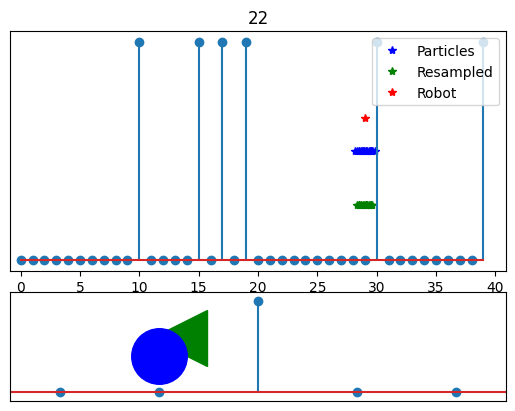

Error: 0.07
Weight Sum: 3.113335002662688



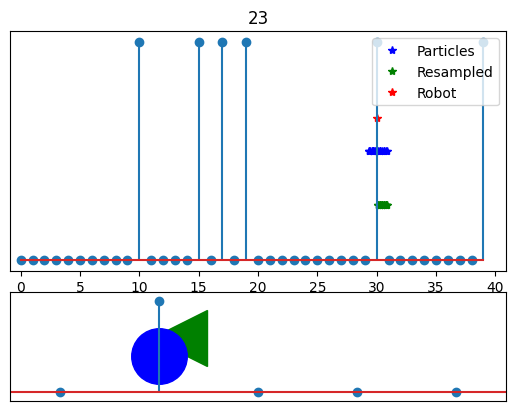

Error: 0.05
Weight Sum: 6.940796122133718



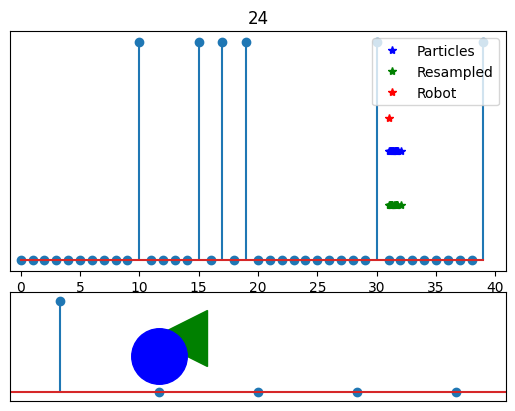

Error: 0.0
Weight Sum: 7.163408434990774



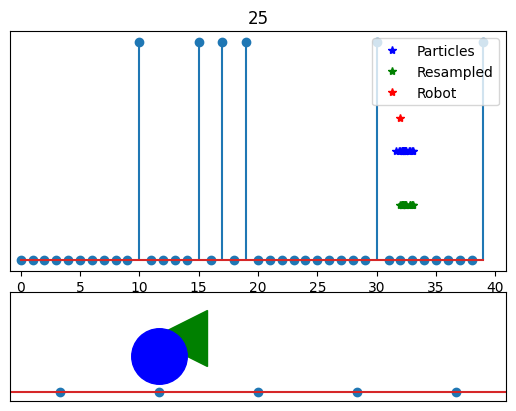

Error: 0.0
Weight Sum: 6.912902514314188



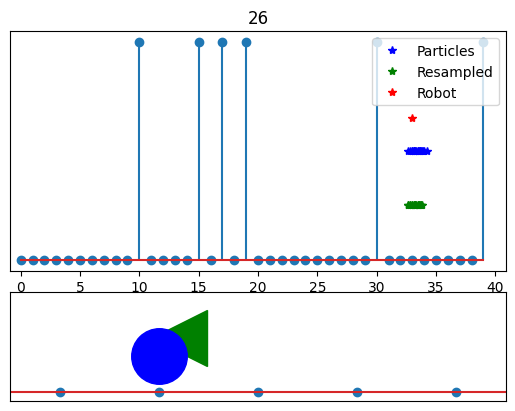

Error: 0.0
Weight Sum: 7.217004092287804



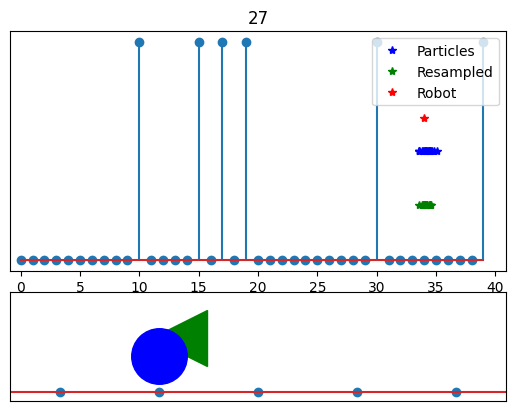

Error: 0.0
Weight Sum: 7.445017747559344



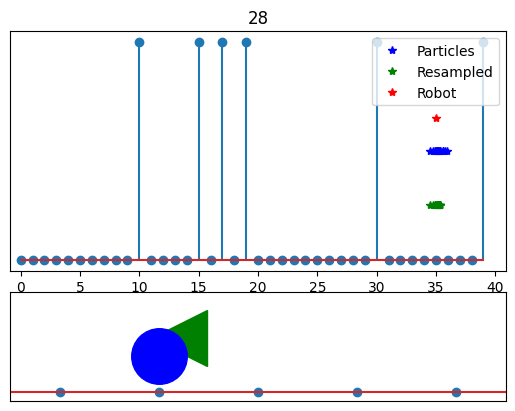

Error: 0.0
Weight Sum: 7.576004650223807



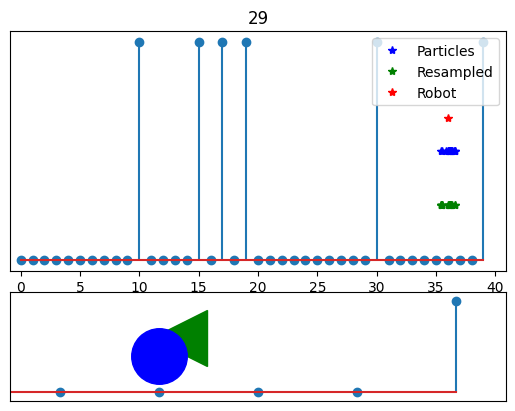

Error: 0.05
Weight Sum: 7.272729147857667



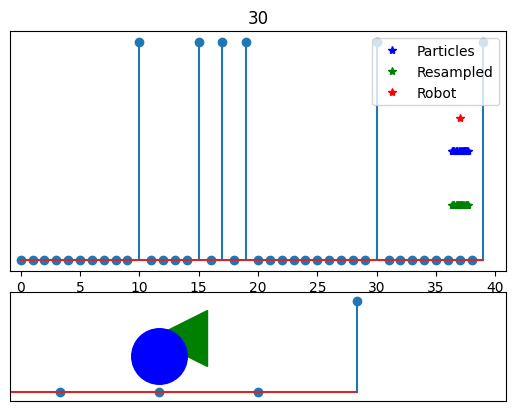

Error: 0.02
Weight Sum: 7.170246045464354



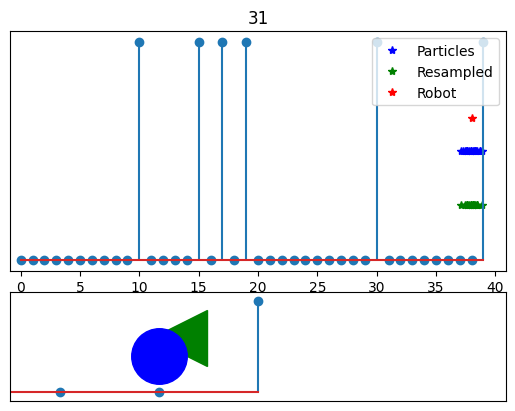

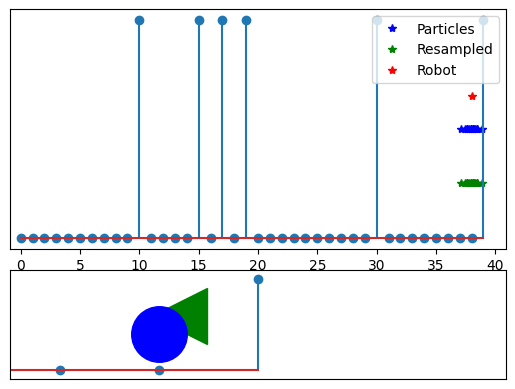

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random as r
import math
from plot import plot, print_particle_error


AUTORUN = False
robot_start = 7
num_particles = 20
distance = 40
poles = [10, 15, 17, 19, 30, 39]


class Robot:
    def __init__(self, pos):
      self.pos = pos
      self.pole_dist = -100
      self.max_measurement = 3
      self.move_dist = 1

    # Movement is perfectly accurate, even though we are assuming it isn't.
    def move(self):
      self.pos += self.move_dist

    # Measurement is perfectly accurate even though we are assuming it isn't.
    def measure(self, poles):
      potential_detected_poles = []
      for pole in poles:
        diff = pole - self.pos
        if diff > 0:
          potential_detected_poles += [diff]
      if len(potential_detected_poles) == 0:
        self.pole_dist = -100
      else:
        self.pole_dist = min(potential_detected_poles)
        if self.pole_dist > self.pole_dist > self.measure:
          self.pole_dist = -100


class Particle(Robot):
    def __init__(self, pos):
      Robot.__init__(self,pos)
      self.weight = 0
      self.movement_sigma = 0.2
      self.measurement_sigma = 1.0

    def predict(self):
      self.pos = np.random.normal(self.pos + self.move_dist, self.movement_sigma)

    def probability_density_function(self, mu, x):
        sigma = self.measurement_sigma
        return 1 / (sigma * math.sqrt(2 * math.pi)) * \
                         math.e**(-0.5 * ((x - mu) / sigma)**2)

    def update_weight(self, robot_dist):
        self.weight = self.probability_density_function(robot_dist, self.pole_dist)


def resample_particles(particles):
    # Potentially resample uniformly if weights are so low.
    weights = []
    for particle in particles:
      weights += [particle.weight]
    if (sum(weights) < 0.05):
      resampled_particles = []
      for i in range(len(particles)):
        resampled_particles += [Particle(r.uniform(0,39))]
      return resampled_particles

    resample = r.choices(range(num_particles), weights, k=num_particles)
    resampled_particles = []
    for i in resample:
      resampled_particles += [Particle(particles[i].pos)]
    return resampled_particles

def initialize_particles(particles):
  diff = distance / num_particles
  for i in range(num_particles):
    particles += [Particle(diff * i)]



robot = Robot(robot_start)

# Setup particles.
particles = []
initialize_particles(particles)

# Plot starting distribution, no beliefs
plot(particles, poles, robot.pos)

# Begin Calculating
for j in range(39 - robot.pos):
    # Move
    if j != 0:
        robot.move()
        for particle in particles:
            particle.predict()

    # Measure
    robot.measure(poles)
    for particle in particles:
        particle.measure(poles)

        # Update Beliefs
        particle.update_weight(robot.pole_dist)

    print_particle_error(robot, particles)

    # Resample
    resampled_particles = resample_particles(particles)
    plot(particles, poles, robot.pos, resampled_particles, j, AUTORUN)
    particles = resampled_particles

plot(particles, poles, robot.pos, resampled_particles)
